A pipeline for processing single-cell RNA-seq data for bladder cancer

This pipeline is based on dataset [GSE146137](https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE146137).


# Preprocessing

In [1]:
import os
import numpy as np
import scanpy as sc
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from scipy.stats import median_abs_deviation as mad
%matplotlib inline

In [2]:
data_path = "data/"
check_path = "checkpoints/"

# os.makedirs(check_path)

os.chdir("../")
print(os.getcwd())

d:\JupyterWorkspace\02620


In [3]:
import warnings
warnings.simplefilter("ignore", FutureWarning)
warnings.simplefilter("ignore", UserWarning)
warnings.simplefilter("ignore", RuntimeWarning)

## Data Preprocess Done!

In [4]:
adata = sc.read_h5ad(check_path + 'harmony.h5ad')

In [5]:
adata

AnnData object with n_obs × n_vars = 23873 × 2723
    obs: 'Sample', 'Title', 'Marker', 'n_genes', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'pct_counts_mt', 'pct_counts_ribo', 'pct_counts_hb', 'batch'
    var: 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'batch_colors', 'hvg', 'log1p', 'neighbors', 'umap'
    obsm: 'X_pca', 'X_pca_harmony', 'X_umap'
    layers: 'counts'
    obsp: 'connectivities', 'distances'

## Leiden

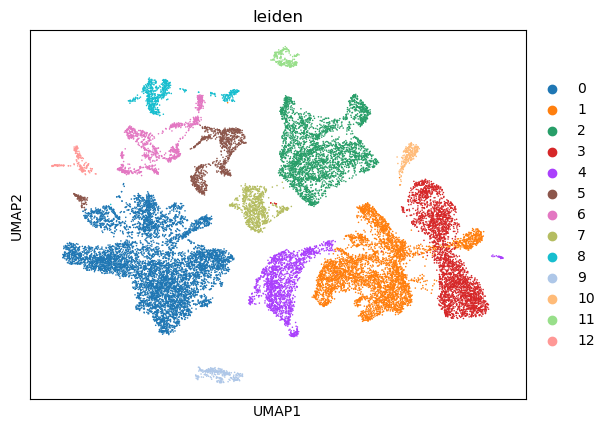

In [6]:
sc.tl.leiden(adata, resolution = 0.1)
sc.pl.umap(adata, color = 'leiden')

In [10]:
adata.obs['']

,Sample,Title,Marker,n_genes,n_genes_by_counts,log1p_n_genes_by_counts,total_counts,log1p_total_counts,pct_counts_in_top_20_genes,pct_counts_mt,pct_counts_ribo,pct_counts_hb,batch,leiden
4950N_AAACCTGAGTTAAGTG,GSM4367145,4950N,Negative,4056,4056,8.308199,14489.0,9.581214,13.803575,0.0,0.0,0.0,4950,1
4950N_AAACCTGCAATAGCAA,GSM4367145,4950N,Negative,2183,2183,7.688913,8255.0,9.018696,17.213810,0.0,0.0,0.0,4950,1
4950N_AAACCTGCACGACTCG,GSM4367145,4950N,Negative,4080,4080,8.314097,22226.0,10.009063,17.992441,0.0,0.0,0.0,4950,2
4950N_AAACCTGCACTAGTAC,GSM4367145,4950N,Negative,1767,1767,7.477604,5363.0,8.587465,24.836845,0.0,0.0,0.0,4950,1
4950N_AAACCTGCAGACGCCT,GSM4367145,4950N,Negative,2527,2527,7.835184,8641.0,9.064389,17.451684,0.0,0.0,0.0,4950,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8525P_TTTGTTGCACGGAAGT,GSM4367150,8525P,Positive,1213,1213,7.101676,3499.0,8.160519,23.292369,0.0,0.0,0.0,8525,6
8525P_TTTGTTGGTGAATGTA,GSM4367150,8525P,Positive,5701,5701,8.648572,33465.0,10.418285,16.303601,0.0,0.0,0.0,8525,0
8525P_TTTGTTGGTTGCATCA,GSM4367150,8525P,Positive,2241,2241,7.715124,7620.0,8.938663,27.664042,0.0,0.0,0.0,8525,0
8525P_TTTGTTGTCACTCACC,GSM4367150,8525P,Positive,3016,3016,8.012018,15577.0,9.653615,24.401361,0.0,0.0,0.0,8525,0


## Add cluster label

In [14]:
adata

AnnData object with n_obs × n_vars = 23873 × 2723
    obs: 'Sample', 'Title', 'Marker', 'n_genes', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'pct_counts_mt', 'pct_counts_ribo', 'pct_counts_hb', 'batch', 'leiden'
    var: 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'batch_colors', 'hvg', 'log1p', 'neighbors', 'umap', 'leiden', 'leiden_colors'
    obsm: 'X_pca', 'X_pca_harmony', 'X_umap'
    layers: 'counts'
    obsp: 'connectivities', 'distances'

In [15]:
adata_combined = sc.read_h5ad(check_path + 'combined.h5ad')

In [16]:
# Map the cluster results
adata_combined.obs['kmeans_clusters'] = adata.obs['leiden']
adata_combined

AnnData object with n_obs × n_vars = 23873 × 19724
    obs: 'Sample', 'Title', 'Marker', 'n_genes', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'pct_counts_mt', 'pct_counts_ribo', 'pct_counts_hb', 'batch', 'kmeans_clusters'
    var: 'n_cells'
    uns: 'log1p'
    layers: 'counts'

In [17]:

adata_combined.write_h5ad(check_path + 'combined_labeled.h5ad')